In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('/content/insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (1338, 7)


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# desribe the dataset (Exploratory data analysis) 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


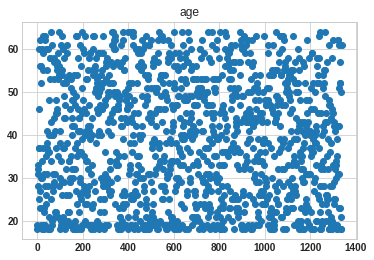

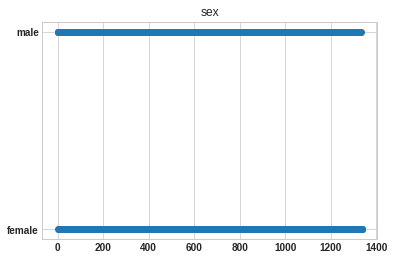

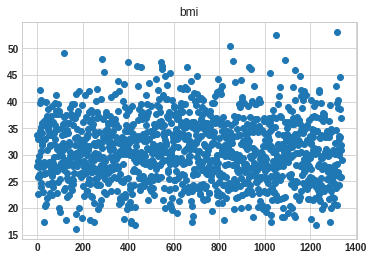

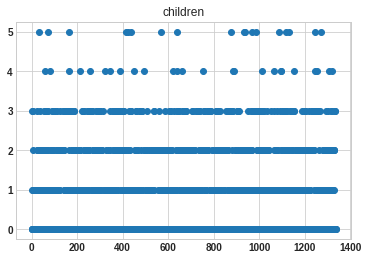

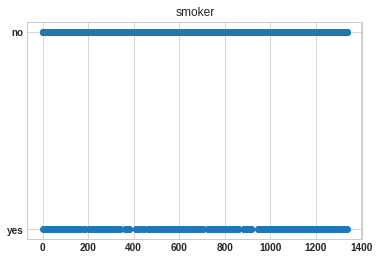

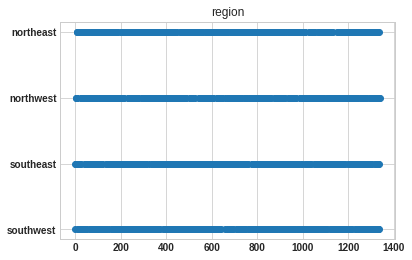

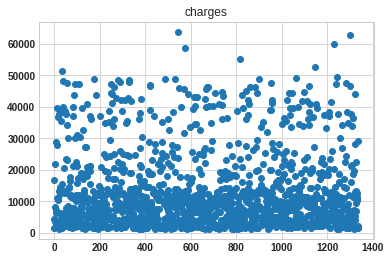

In [3]:
x = range(df.shape[0])
for i in df.columns:
  plt.scatter(x,df[i])
  plt.title(i)
  plt.show()

In [ ]:
#Check for missing value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# correlation plot
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Distribution of insurance charges in $log$ sacle')

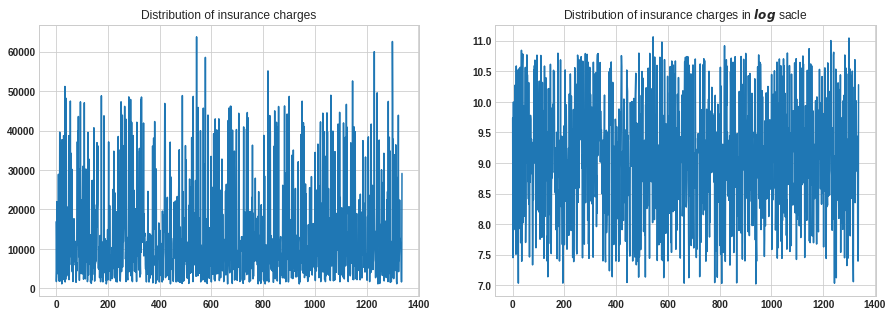

In [ ]:
#Plot the distribution of the dependent variable
f= plt.figure(figsize=(15,5))
ax=f.add_subplot(121)
i = list(range(df.shape[0]))
ax.plot(i,df.loc[i,'charges'])
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
ax.plot(i,np.log(df.loc[i,'charges']))
ax.set_title('Distribution of insurance charges in $log$ sacle')

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['sex'] = enc.fit_transform(df['sex'])
df['smoker'] = enc.fit_transform(df['smoker'])
df['region'] = enc.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# Log transform of dependent variable
df['log_transform'] = np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges,log_transform
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
x = df.loc[:,'age':'region']
y = df['log_transform']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

,age,sex,bmi,children,smoker,region
436,22,1,31.730,0,0,0
886,57,1,28.975,0,1,0
514,39,1,28.300,1,1,3
928,62,0,39.160,0,0,2
417,36,0,22.600,2,1,3


#Model building

In [ ]:
# Step 1: add x0 =1 to dataset
import copy
x_train_new = copy.deepcopy(x_train)
x_test_new = copy.deepcopy(x_test)
x_train_new['xo'] = 1
x_test_new['xo'] = 1
x_train_new.head()

,age,sex,bmi,children,smoker,region,xo
436,22,1,31.730,0,0,0,1
886,57,1,28.975,0,1,0,1
514,39,1,28.300,1,1,3,1
928,62,0,39.160,0,0,2,1
417,36,0,22.600,2,1,3,1


In [ ]:
# Step2: build model θ= inverse(X_transpose * X)*X_transpose*y 
def theta(x,y):
  x = np.array(x)
  a = np.dot(x.transpose(),x)
  #print(x,a)
  return(np.dot(np.dot(np.linalg.inv(a),x.transpose()),y))
parameters = theta(x_train_new,y_train)

# The parameters for linear regression model
print(parameters)

[ 0.03386144 -0.06066302  0.01140949  0.10016429  1.54669051 -0.03834556
  7.0917214 ]


In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()
model_sk.fit(x_train,y_train)

#Parameter
params = model_sk.get_params()
print('weights : ', model_sk.coef_)
print('Intercept : ', model_sk.intercept_)
params

weights :  [ 0.03386144 -0.06066302  0.01140949  0.10016429  1.54669051 -0.03834556]
Intercept :  7.091721404756623


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#Model evaluation

In [ ]:
# prediction
y_pred =  []
n = x_test_new.shape[0]
for i in range(n):
  ans = 0
  for j in range(len(x_test_new.columns)):
    ans+=parameters[j]*x_test_new.iloc[i,j]
  y_pred.append(ans)
y_pred

[8.511316181148054,
 9.303414898873562,
 8.84067911999775,
 8.86202729470146,
 8.337656895684624,
 8.86079839180729,
 9.584853530955865,
 9.887634179083381,
 9.946084864813852,
 8.134629541794935,
 10.939279524432335,
 9.514444647417633,
 10.02302077254583,
 8.19133769501255,
 8.170059522466254,
 8.238868221120214,
 9.822289303326036,
 8.973727286575517,
 8.442412509065932,
 8.792684998084368,
 9.357681801905334,
 8.638476774149881,
 10.524717079662341,
 9.327368027019569,
 8.442222770203784,
 10.122873166137332,
 8.341614414984873,
 8.901502886198413,
 8.469512182327323,
 9.454889204799386,
 9.969650161337205,
 10.790228414418383,
 8.439668601058763,
 8.070044276230522,
 8.480724713741767,
 8.360227507806426,
 8.660187756700832,
 8.537046381117865,
 8.168928361204733,
 7.96005496922739,
 8.740535530579013,
 9.918810548237115,
 8.436392030125512,
 8.336016541648135,
 8.45138181292787,
 9.402042421489455,
 9.262356138230576,
 8.183853962500955,
 9.599582827785953,
 9.17794892795131,
 9.

In [ ]:
#Evaluvation: MSE (Write your MSE equation from scratch)
def mse(y_test,y_pred):
  sum = 0
  n = y_test.shape[0]
  for i in range(n):
    sum += (y_test.iloc[i]-y_pred[i])**2
  return sum/n
J_mse = mse(y_test,y_pred)
J_mse

0.1987110556807042

In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.1987110556807042


In [ ]:
# sklearn regression module
y_pred_sk = model_sk.predict(x_test)
y_pred_sk


array([ 8.51131618,  9.3034149 ,  8.84067912,  8.86202729,  8.3376569 ,
        8.86079839,  9.58485353,  9.88763418,  9.94608486,  8.13462954,
       10.93927952,  9.51444465, 10.02302077,  8.1913377 ,  8.17005952,
        8.23886822,  9.8222893 ,  8.97372729,  8.44241251,  8.792685  ,
        9.3576818 ,  8.63847677, 10.52471708,  9.32736803,  8.44222277,
       10.12287317,  8.34161441,  8.90150289,  8.46951218,  9.4548892 ,
        9.96965016, 10.79022841,  8.4396686 ,  8.07004428,  8.48072471,
        8.36022751,  8.66018776,  8.53704638,  8.16892836,  7.96005497,
        8.74053553,  9.91881055,  8.43639203,  8.33601654,  8.45138181,
        9.40204242,  9.26235614,  8.18385396,  9.59958283,  9.17794893,
        9.52334616,  8.33673288,  9.89599858,  9.02272226,  8.08001824,
        7.98170793, 10.96364527,  9.48580351,  8.46655729,  8.82990481,
        9.63087434,  9.08537546,  9.15118845,  9.37330632, 10.56483825,
        7.94022688,  8.18740632,  9.1030488 ,  8.77489988,  9.22

In [ ]:
#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_test,y_pred_sk)

In [ ]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.19871105568070455


In [ ]:
print(x_test.shape,y_test.shape)

(402, 6) (402,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


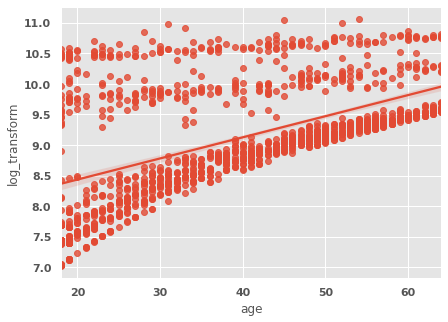

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


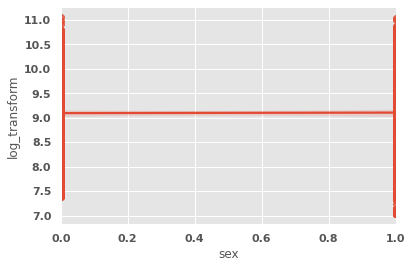

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


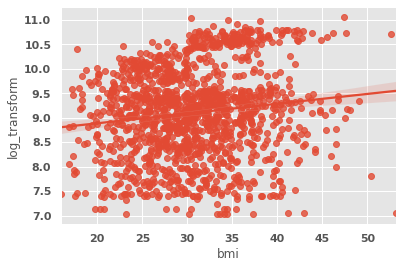

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


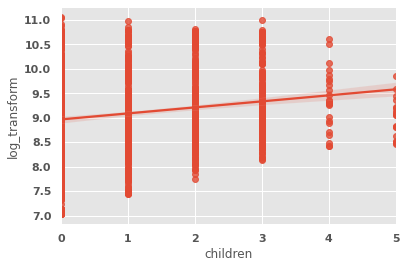

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


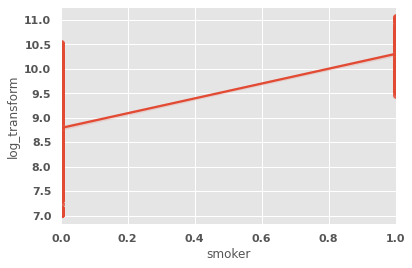

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


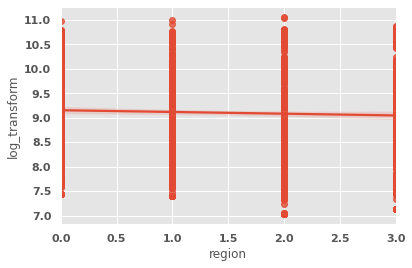

In [ ]:
# Check for Linearity
import seaborn as sns
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
#relationship between independent and dependent variables
for i in df.columns[:-2]:
  sns.regplot(df[i],df.log_transform,data = df)
  plt.show()

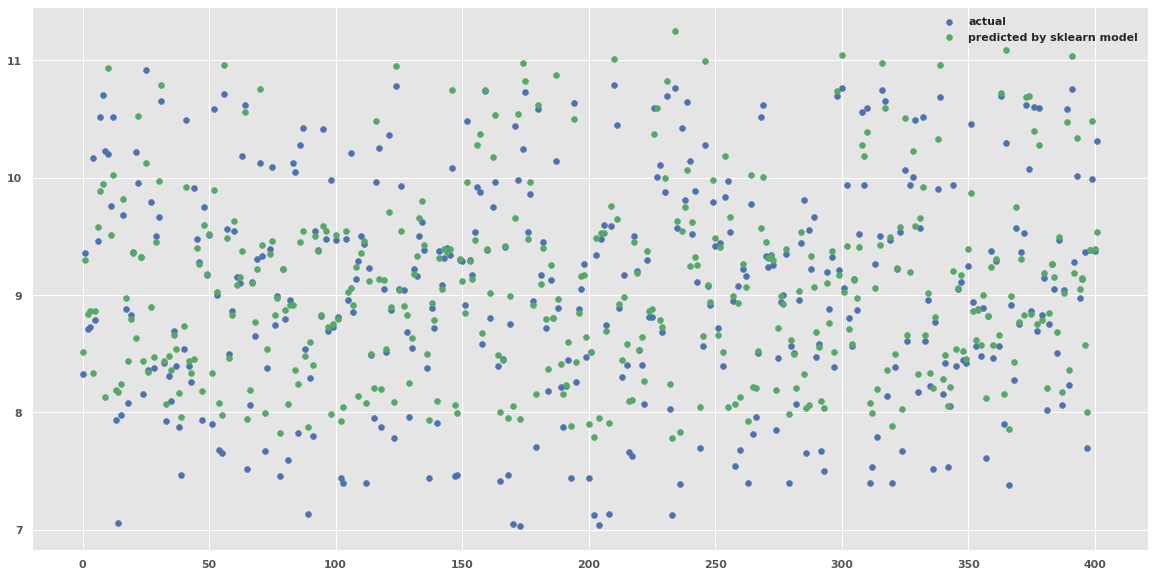

In [ ]:
#comparison between actual and predicted values
f = plt.figure(figsize=(20,10))
plt.scatter(list(range(n)),y_test,label = 'actual', color = 'b')
plt.scatter(list(range(n)),y_pred_sk, label = 'predicted by sklearn model', color = 'g')
plt.legend()
plt.show()

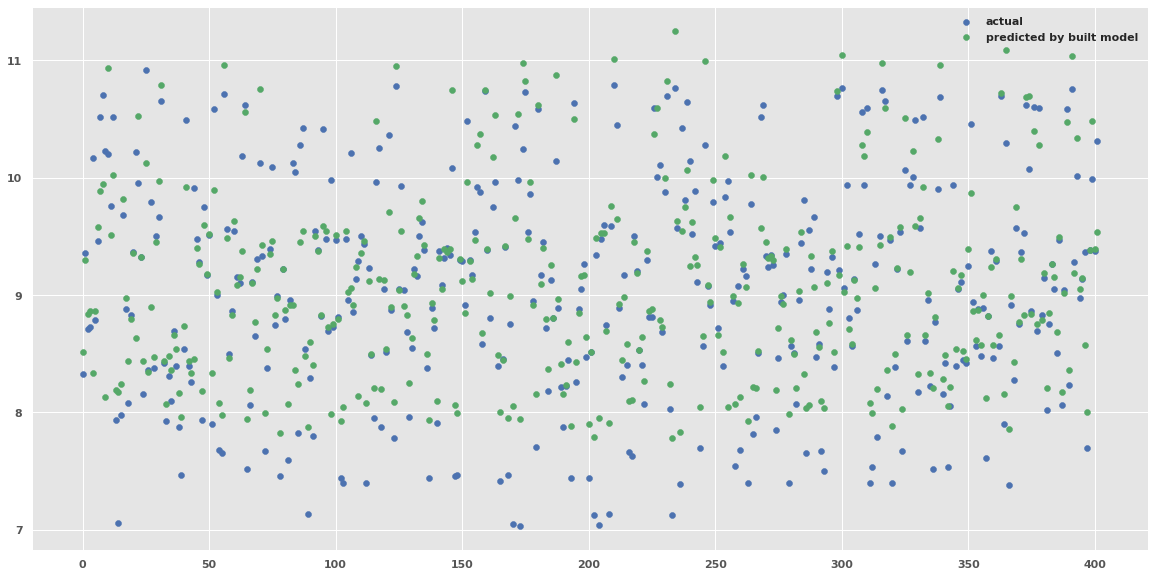

In [ ]:
f = plt.figure(figsize=(20,10))
plt.scatter(list(range(n)),y_test,label = 'actual', color = 'b')
plt.scatter(list(range(n)),y_pred, label = 'predicted by built model', color = 'g')
plt.legend()
plt.show()